# Chapter 20 - Clustering

### The Model

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import itertools
import random
import tqdm
import math

Vector = List[float]

In [21]:
def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

In [22]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

In [23]:
def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

In [24]:
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14  # 1 * 1 + 2 * 2 + 3 * 3

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

In [25]:
class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k                      # number of clusters
        self.means = None

    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]

                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return

                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")


### Example: Meetups

In [26]:
inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [27]:
# random.seed(12)                   # so you get the same results as me
# clusterer = KMeans(k=3)
# clusterer.train(inputs)
# means = sorted(clusterer.means)   # sort for the unit test

# assert len(means) == 3

# # Check that the means are close to what we expect.
# assert squared_distance(means[0], [-44, 5]) < 1
# assert squared_distance(means[1], [-16, -10]) < 1
# assert squared_distance(means[2], [18, 20]) < 1

# random.seed(0)
# clusterer = KMeans(k=2)
# clusterer.train(inputs)
# means = sorted(clusterer.means)

# assert len(means) == 2
# assert squared_distance(means[0], [-26, -5]) < 1
# assert squared_distance(means[1], [18, 20]) < 1

### Choosing K

0it [00:00, ?it/s]
changed: 8 / 20: : 1it [00:00, 329.17it/s]
changed: 1 / 20: : 3it [00:00, 353.23it/s]
changed: 1 / 20: : 3it [00:00, 583.33it/s]
changed: 5 / 20: : 2it [00:00, 474.71it/s]
changed: 3 / 20: : 2it [00:00, 321.13it/s]
changed: 4 / 20: : 3it [00:00, 349.74it/s]
changed: 1 / 20: : 3it [00:00, 395.40it/s]
changed: 1 / 20: : 3it [00:00, 303.80it/s]
changed: 2 / 20: : 3it [00:00, 310.33it/s]
changed: 1 / 20: : 3it [00:00, 232.47it/s]
changed: 2 / 20: : 4it [00:00, 341.88it/s]
changed: 2 / 20: : 3it [00:00, 317.13it/s]
changed: 1 / 20: : 4it [00:00, 409.03it/s]
changed: 1 / 20: : 3it [00:00, 325.85it/s]
changed: 1 / 20: : 4it [00:00, 288.82it/s]
changed: 1 / 20: : 4it [00:00, 322.30it/s]
changed: 1 / 20: : 4it [00:00, 363.70it/s]
changed: 2 / 20: : 3it [00:00, 261.98it/s]
changed: 7 / 20: : 2it [00:00, 288.80it/s]


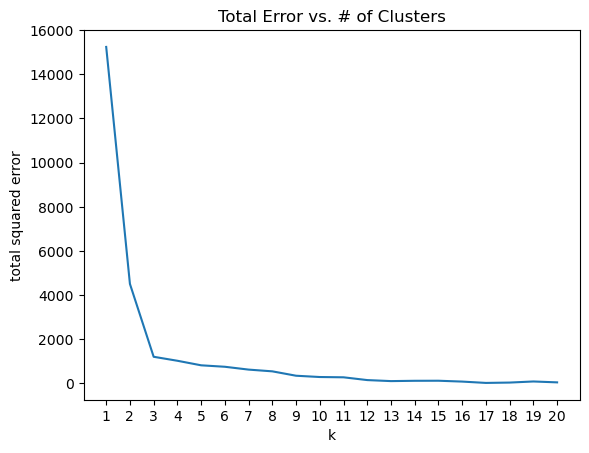

In [28]:
def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
        """finds the total squared error from k-means clustering the inputs"""
        clusterer = KMeans(k)
        clusterer.train(inputs)
        means = clusterer.means
        assignments = [clusterer.classify(input) for input in inputs]
    
        return sum(squared_distance(input, means[cluster])
                   for input, cluster in zip(inputs, assignments))
    
    # now plot from 1 up to len(inputs) clusters
    
ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

### Botton-Up Hierarchical Clustering

In [29]:
from typing import NamedTuple, Union

class Leaf(NamedTuple):
    value: Vector

leaf1 = Leaf([10,  20])
leaf2 = Leaf([30, -15])

class Merged(NamedTuple):
    children: tuple
    order: int

merged = Merged((leaf1, leaf2), order=1)

Cluster = Union[Leaf, Merged]

In [30]:
def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value
                for child in cluster.children
                for value in get_values(child)]

assert get_values(merged) == [[10, 20], [30, -15]]

In [31]:
from typing import Callable

In [32]:
def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

In [33]:
def cluster_distance(cluster1: Cluster,
                     cluster2: Cluster,
                     distance_agg: Callable = min) -> float:
    """
    compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    return distance_agg([distance(v1, v2)
                         for v1 in get_values(cluster1)
                         for v2 in get_values(cluster2)])

In [34]:
def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf')  # was never merged
    else:
        return cluster.order

from typing import Tuple

def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children

In [35]:
def bottom_up_cluster(inputs: List[Vector],
                      distance_agg: Callable = min) -> Cluster:
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(input) for input in inputs]

    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)

    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min(((cluster1, cluster2)
                      for i, cluster1 in enumerate(clusters)
                      for cluster2 in clusters[:i]),
                      key=pair_distance)

        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]

        # merge them, using merge_order = # of clusters left
        merged_cluster = Merged((c1, c2), order=len(clusters))

        # and add their merge
        clusters.append(merged_cluster)

    # when there's only one cluster left, return it
    return clusters[0]

In [38]:
base_cluster = bottom_up_cluster(inputs)

In [39]:
def generate_clusters(base_cluster: Cluster,
                      num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]

    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]

        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))

    # once we have enough clusters...
    return clusters

In [43]:
three_clusters = [get_values(cluster)
                 for cluster in generate_clusters(base_cluster, 3)]

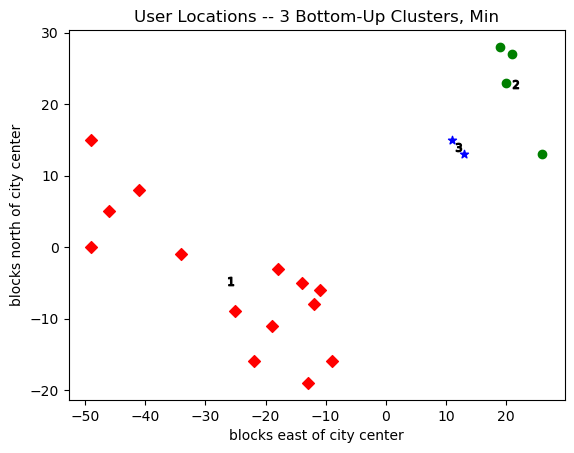

In [45]:
for i, cluster, marker, color in zip([1, 2, 3],
                                         three_clusters,
                                         ['D','o','*'],
                                         ['r','g','b']):
        xs, ys = zip(*cluster)  # magic unzipping trick
        plt.scatter(xs, ys, color=color, marker=marker)
    
        # put a number at the mean of the cluster
        x, y = vector_mean(cluster)
        plt.plot(x, y, marker='$' + str(i) + '$', color='black')
        
plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

In [50]:
# base_cluster_max = bottom_up_cluster(inputs, max)
# three_clusters_max = [get_values(cluster)
#                       for cluster in generate_clusters(base_cluster_max, 3)]
    
# for i, cluster, marker, color in zip([1, 2, 3],
#                                      three_clusters_max,
#                                      ['D','o','*'],
#                                      ['r','g','b']):
#     xs, ys = zip(*cluster)  # magic unzipping trick
#     plt.scatter(xs, ys, color=color, marker=marker)

#     # put a number at the mean of the cluster
#     x, y = vector_mean(cluster)
#     plt.plot(x, y, marker='$' + str(i) + '$', color='black')
    
# plt.title("User Locations -- 3 Bottom-Up Clusters, Max")
# plt.xlabel("blocks east of city center")
# plt.ylabel("blocks north of city center")
# plt.savefig('im/bottom_up_clusters_max.png')
# plt.gca().clear()